In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/salary_synteticdata.csv')

In [3]:
data.head()

,Age,Salary
0,52,94500
1,45,82250
2,33,61250
3,47,85750
4,37,68250


In [4]:
data.isna().sum()

Age       0
Salary    0
dtype: int64

In [5]:
data.dtypes

Age       int64
Salary    int64
dtype: object

In [6]:
data.shape

(1000, 2)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa453860640>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa453860d00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa4538602e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa4537ea400>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa4537ea700>],
 'means': []}

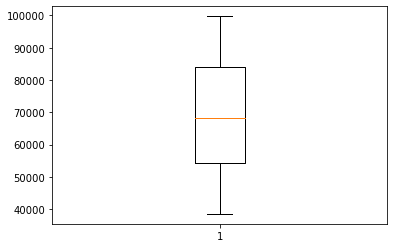

In [7]:
plt.boxplot(data['Salary']) #there are no outliers since the data is synthetic

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa45376b3d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa45376ba90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa45376b070>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa453778190>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa453778490>],
 'means': []}

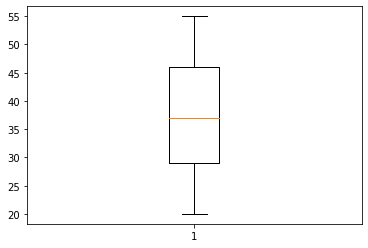

In [8]:
plt.boxplot(data['Age']) #there are no outliers since the data is synthetic

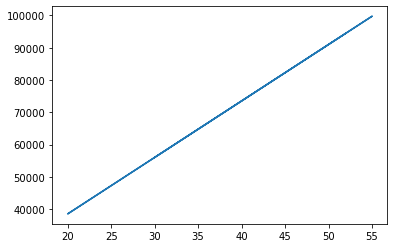

In [9]:
plt.plot(data['Age'],data['Salary']) #data has a good liner relationship

In [10]:
data.corr() #data has a correlation of 1

,Age,Salary
Age,1.0,1.0
Salary,1.0,1.0


### since there is no missing values and impurities no preprocessing is required.


### split the data into X and y
- X is the set of input variables (Age)
- y is the target variable (Salary)

In [11]:
X = data['Age']
y = data['Salary']

In [12]:
X.head()

0    52
1    45
2    33
3    47
4    37
Name: Age, dtype: int64

In [13]:
y.head()

0    94500
1    82250
2    61250
3    85750
4    68250
Name: Salary, dtype: int64

In [14]:
type(X)

pandas.core.series.Series

In [15]:
X.shape

(1000,)

### For a sklearn model the input X should be a DataFrame

In [16]:
X=X.values.reshape(X.shape[0], 1) #X should be an 2d array or dataframe

In [17]:
X.shape

(1000, 1)

# split the data into train and test sets
- Train data is used for training the model
- Test data is used to test/evaluate the model

In [18]:
from sklearn.model_selection import train_test_split #we are only importing  train_test_split function from sklearn within the class model_selection

#train_test_split is splitiing the data randomnly

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25) #75% data will be for training and 25% data for testing

In [19]:
X_train.shape

(750, 1)

In [20]:
X_test.shape

(250, 1)

In [21]:
y_train.shape #this is a series

(750,)

In [22]:
y_test.shape

(250,)

### Use Linear Regression for modelling

In [23]:
from sklearn.linear_model import LinearRegression  #importing LinearRegression from sklearn within the class linear_model

In [24]:
lin_reg = LinearRegression() #creating object of LinearRegression

### fit command is used for training a model using train data.

In [25]:
lin_reg.fit(X_train,y_train) #training and fitting LR object using training data

LinearRegression()

#### coeeficients of linear regression - m

In [26]:
m  = lin_reg.coef_
m[0]

1749.9999999999993

#### intercept of linear regression - c

In [27]:
c = lin_reg.intercept_
c

3500.000000000029

### predicting the salary for testing data

#### predict command is used for predicting target variable for Xtest

In [28]:
ypred=lin_reg.predict(X_test)  #ypred consist of the predicted salary corresponding to X_test

#### in this context actual value will be y_test and predicted value will be ypred..
#### error is calculated in such a way that vraiation of ypred from y_test

In [29]:
ypred

array([98000., 52500., 49000., 96250., 77000., 68250., 94500., 54250.,
       43750., 99750., 61250., 82250., 96250., 63000., 84000., 54250.,
       96250., 57750., 42000., 59500., 64750., 70000., 56000., 71750.,
       89250., 43750., 78750., 84000., 66500., 98000., 61250., 78750.,
       63000., 64750., 38500., 50750., 49000., 66500., 63000., 38500.,
       64750., 50750., 54250., 80500., 91000., 80500., 84000., 84000.,
       43750., 63000., 82250., 87500., 64750., 80500., 75250., 38500.,
       43750., 99750., 42000., 45500., 98000., 54250., 52500., 78750.,
       59500., 64750., 89250., 64750., 50750., 78750., 49000., 42000.,
       75250., 57750., 84000., 99750., 84000., 77000., 77000., 42000.,
       59500., 78750., 91000., 84000., 52500., 59500., 59500., 66500.,
       38500., 73500., 54250., 92750., 43750., 63000., 49000., 71750.,
       61250., 73500., 63000., 85750., 71750., 87500., 85750., 96250.,
       92750., 87500., 56000., 96250., 99750., 66500., 42000., 89250.,
      

In [30]:
from sklearn.metrics import mean_squared_error #calculating MSE
MSE=mean_squared_error(ypred,y_test)
print("MSE:",MSE)

MSE: 6.988021814847978e-23


In [31]:
sum((y_test-ypred)**2)/len(ypred) #this is how we can calculate MSE.

6.988021814847978e-23

In [32]:
#END